## Netflix Data Visualization

In [8]:
#imported libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Create a datafram, sales from a csv file all_sales
df = pd.read_csv('netflix_titles.csv')
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


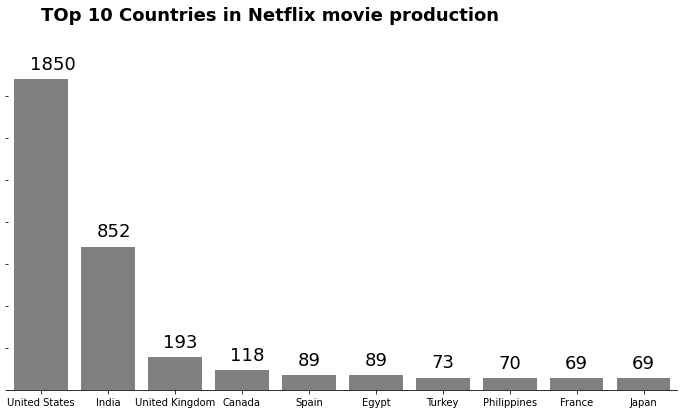

In [16]:
movies_df = df[df['type'] == 'Movie']
top10country_movies = movies_df.groupby(['country']).size().sort_values(ascending=False)[0:10]

plt.figure(figsize = (12,6))
g = sns.barplot(x = top10country_movies.index, y=top10country_movies, color = 'grey')
g.text(0,2200, 'TOp 10 Countries in Netflix movie production',
      fontsize = 18, fontweight = 'bold', color = 'black')

for i in ['top', 'left', 'right']:
    g.spines[i].set_visible(False)

for i in g.patches:
    g.text(i.get_x()+i.get_width()/3.5,
           i.get_height()+60,
           round(i.get_height()),
           fontsize = 18)
    
g.set(yticklabels = [])
plt.xlabel('')
plt.ylabel('')

plt.show()

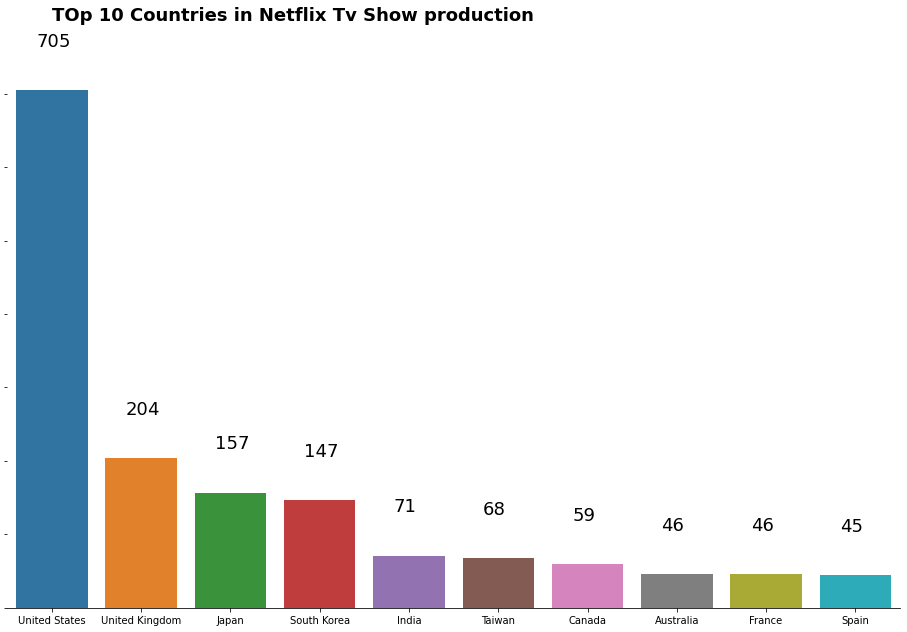

In [14]:
tvshows_df = df[df['type'] == 'TV Show']
top10country_tvshows = tvshows_df.groupby(['country']).size().sort_values(ascending=False)[0:10]

plt.figure(figsize = (16,10))
g = sns.barplot(x = top10country_tvshows.index, y=top10country_tvshows, palette = 'colorblind')
g.text(0,800, 'TOp 10 Countries in Netflix Tv Show production',
      fontsize = 18, fontweight = 'bold', color = 'black')

for i in ['top', 'left', 'right']:
    g.spines[i].set_visible(False)

for i in g.patches:
    g.text(i.get_x()+i.get_width()/3.5,
           i.get_height()+60,
           round(i.get_height()),
           fontsize = 18)
    
g.set(yticklabels = [])
plt.xlabel('')
plt.ylabel('')

plt.show()

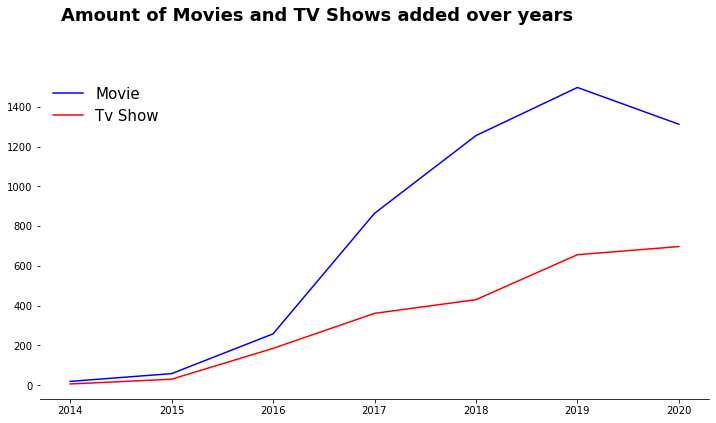

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
index = [2014,2015,2016,2017,2018,2019,2020]

#Movies added from 2014 to 2020
ts_df = df[df['year_added']>2013]
ts_df = ts_df[ts_df['year_added']<2021].groupby('type')['year_added'].value_counts().unstack().T

fig, ax = plt.subplots(1,1,figsize=(12,6))
fig.text(0.15,1,'Amount of Movies and TV Shows added over years',
        fontsize = 18, fontweight='bold', color='black')

#Line charts
g1 = sns.lineplot(x=ts_df.index,y=ts_df['Movie'], color = 'blue', label = 'Movie')
g2 = sns.lineplot(x=ts_df.index, y=ts_df["TV Show"], color = 'red', label = 'Tv Show')

for i in ['top','left','right']:
    ax.spines[i].set_visible(False)
    
ax.legend(loc='upper left', frameon=False, prop = {'size':15})
plt.xlabel('')
plt.ylabel('')

plt.show()



